# Introduction

In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.


# Loading Tensorflow and checking the version


In [1]:
import tensorflow as tf

print(tf.__version__)


2.7.0


- If not installed, uncomment the following cell.
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).


In [2]:
#!pip install tensorflow==2.5.0


# Data Loading and exploring


In [3]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()


In [4]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print(
    "The shape of an image is {}X{}".format(
        training_images.shape[1], training_images.shape[2]
    )
)


The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [5]:
import numpy as np
import random

np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt


6


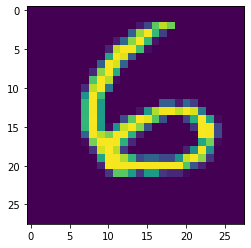

In [6]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])


All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`


In [7]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0


# Defining the model using **Sequential** API


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [9]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax),
    ]
)


2022-01-25 21:29:46.536282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 21:29:46.546240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 21:29:46.546721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 21:29:46.547540: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**


In [11]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


Train the model


In [12]:
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0591 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0464 - accuracy: 0.9857


Evaluate the model on the test images


In [13]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1] * 100))


313/313 [==============================] - 1s 1ms/step - loss: 0.0784 - accuracy: 0.9752
Accuracy on the testing images is 97.51999974250793


# Save and Load a Model

A model's architecture, weights, and training configuration can be saved in a single file/folder which allows accessing a model without the need for the python source code

- SavedModel format
- HDF5 format


## SavedModel format


In [14]:
!mkdir -p saved_model
model.save('saved_model/my_model')

2022-01-25 21:32:16.147314: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [15]:
from tensorflow.keras.models import load_model

new_model = load_model("saved_model/my_model")

# Check its architecture
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
evaluation = new_model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1] * 100))


313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9752
Accuracy on the testing images is 97.51999974250793


## HDF5 format

A basic save format using the **HDF5** standard


In [17]:
model.save("my_model.h5")


In [18]:
from tensorflow.keras.models import load_model

new_model_h5 = load_model("my_model.h5")

# Check its architecture
new_model_h5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
evaluation = new_model_h5.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1] * 100))


313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9752
Accuracy on the testing images is 97.51999974250793
